In [233]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks, argrelmin, find_peaks_cwt
import pandas as pd
from collections import Counter
from scipy import signal

In [234]:
from sklearn.linear_model import SGDRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error 


from sklearn.pipeline import make_pipeline


In [235]:
#path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a001/a001.initial.Calibration_start_3.tsv"
# #path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a002/a002.initial.Static_seated_challenge_1.tsv"
path ="/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a004/a004.initial.Exercise_challenge_start_1.tsv"
#path = "/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a000/a000.initial.Static_challenge_start_1.tsv"


#path ="/Users/cslinxs/Desktop/all_weeks/aurorabp-sample-data/sample/measurements_auscultatory/a000/a000.initial.Static_seated_challenge_1.tsv"

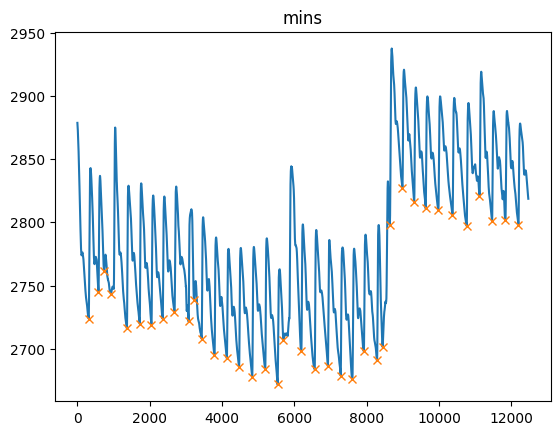

In [236]:

df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]

neglist = [ -x for x in pos_pressure]

min_peaks, _ = find_peaks(neglist, prominence=10)


plt.plot(pos_pressure)
plt.plot(min_peaks, pos_pressure[min_peaks], "x")
plt.title("mins")
plt.show()


<class 'numpy.ndarray'>


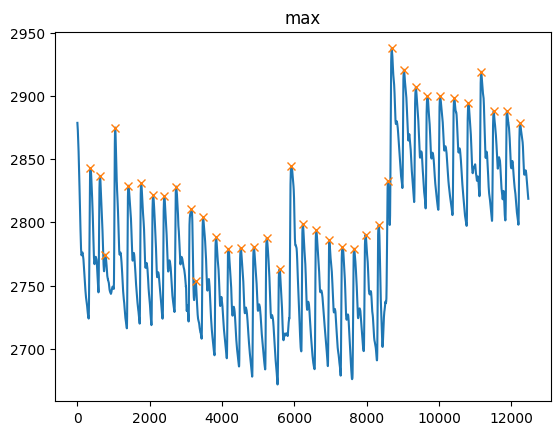

In [237]:

df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]


max_peak, _ = find_peaks(pos_pressure, prominence=10)

plt.plot(pos_pressure)
print(type(max_peak))
plt.plot(max_peak, pos_pressure[max_peak], "x")
plt.title("max")

plt.show()

In [238]:
#this is so i can see the diffrences in the graph widths
diffrences_min = np.diff(min_peaks)
mean_min = float(diffrences_min.mean())

diffrences_max = np.diff(max_peak)
mean_max = float(diffrences_max.mean())


print(mean_min,mean_max )

321.18918918918916 321.1081081081081


In [239]:
#this edeleuets all elemerns with in 40 of the mini
need_to_go  = []

set_max_peak = set(max_peak)
for mini in list(min_peaks):
    if len(set(range(mini-40,40+mini)).intersection(set_max_peak))>0:
        need_to_go.append(int(mini))

combo_list =  list(min_peaks)+ (need_to_go)
combo_list = [int(i) for i in combo_list]

# juts deleted stuff from both lists if its in tht 40 range
new_mins = [k for k,v in Counter(combo_list).items() if v==1]



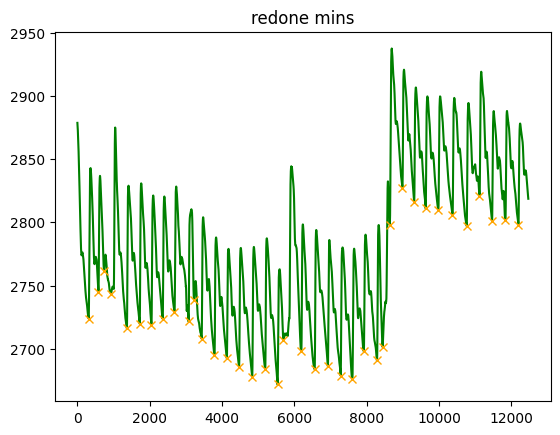

In [240]:

#fileted ghrough mins
df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]


plt.plot(pos_pressure, color="green")


newst_mins= np.asarray(list(new_mins), dtype=np.float32)

plt.plot(newst_mins, pos_pressure[newst_mins], "x", color="orange")
plt.title("redone mins")

plt.show()

This the diffrence in means:

In [241]:
#print(min_peaks,peaks)
diffrences_min = np.diff(min_peaks)

mean_min = float(diffrences_min.mean())

diffrences_max = np.diff(max_peak)

mean_max = float(diffrences_max.mean())


diffrences_new_min = np.diff(newst_mins)

mean_new_min = float(diffrences_new_min.mean())


print(mean_min,mean_max,mean_new_min )


321.18918918918916 321.1081081081081 321.1891784667969


In [242]:
diffrences_new_min

array([271., 155., 190., 440., 355., 325., 307., 331., 390., 152., 208.,
       356., 339., 340., 362., 360., 343., 164., 492., 366., 368., 355.,
       316., 321., 365., 156., 199., 350., 325., 318., 350., 392., 390.,
       357., 346., 368., 362.], dtype=float32)

In [243]:
# here i think if i get the stats of the list i can ssee if something is weird and drop the point
#  BUTTTT HERE IS WHERE I SEE WHAT POINT HAS TO GO

def get_stats(check_list):
    standard = float(np.std(check_list))
    mean = float(np.mean(check_list))
    return [min(check_list),mean-standard-standard,mean-standard,mean,mean + standard,mean +standard+standard ,max(check_list) ]
get_stats(diffrences_new_min)[5]

480.6482849121094

here is where i wanna remvoe the things tooo far away frommthe mena

so i will say noise is when the chatr is showing a beat within 20 mins of another

if something is 20+- another beat in the other list it is removed

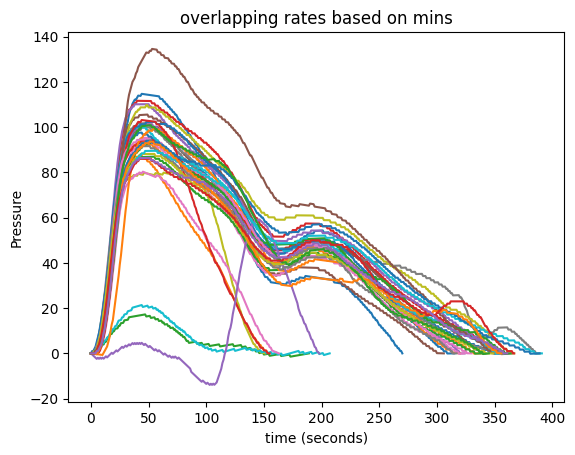

In [244]:
all_overlaps = [[] for i in range(int(max(diffrences_new_min)))]

df = pd.read_csv(path,sep = '\t')   
pos_pressure = df["pressure"]

newst_mins= np.asarray(list(new_mins), dtype=np.float32)

mini_list = list(newst_mins)

for i in range(len(mini_list)-1):

    if (int(mini_list[i+1]) -int(mini_list[i]))< get_stats(diffrences_new_min)[4] :
        y_range  = list(range(int(mini_list[i]),int(mini_list[i+1])))
        y_of_shift = [int(y - min(pos_pressure[y_range])) for y in pos_pressure[y_range]]

        x_range = list(range(int(mini_list[i]),int(mini_list[i+1])))
        x_of_shift = [int(x - x_range[0]) for x in x_range]
        start_end_line = np.linspace(y_of_shift[0], y_of_shift[-1], len(y_of_shift), endpoint=True)

        y_rotated = [xi - yi for xi, yi in zip(y_of_shift, start_end_line)]


        for x_indi in range(len(x_range)):
            #print(x_indi)
            #all_overlaps[x_indi].append(
            all_overlaps[x_indi].append(int(y_of_shift[x_indi]-start_end_line[x_indi]))
        
        # um all_overlaps and y_rotated does the same thing... i think, it is but it has some error
        
        #plt.plot(start_end_line)
        

        plt.plot(x_of_shift, y_rotated)



plt.title("overlapping rates based on mins")
plt.ylabel("Pressure")
plt.xlabel("time (seconds)")

plt.show()

/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/cslinxs/Library/Python/3.9/lib/python/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


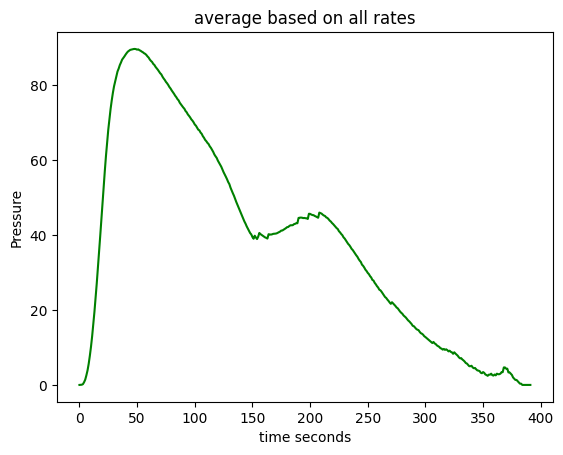

In [245]:
#to get data for the overall mean 
all_overlaps_means = []
#mean for each row
for lists in all_overlaps:
    all_overlaps_means.append(np.mean(lists))
all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']
plt.plot(all_overlaps_means, color='green')
plt.title("average based on all rates")
plt.ylabel("Pressure")
plt.xlabel("time seconds")
contecting_it = np.linspace(all_overlaps_means[0], all_overlaps_means[-1], len(all_overlaps_means), endpoint=True)
#plt.plot(contecting_it)
plt.show()
all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']


In [246]:
print(contecting_it)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

IMPOETANPINTS

In [247]:
all_overlaps_means

[np.float64(0.0),
 np.float64(0.02857142857142857),
 np.float64(0.05714285714285714),
 np.float64(0.2),
 np.float64(0.7142857142857143),
 np.float64(1.4),
 np.float64(2.5428571428571427),
 np.float64(3.857142857142857),
 np.float64(5.6),
 np.float64(7.742857142857143),
 np.float64(10.17142857142857),
 np.float64(12.971428571428572),
 np.float64(16.17142857142857),
 np.float64(19.514285714285716),
 np.float64(23.228571428571428),
 np.float64(27.085714285714285),
 np.float64(31.2),
 np.float64(35.48571428571429),
 np.float64(39.714285714285715),
 np.float64(44.142857142857146),
 np.float64(48.542857142857144),
 np.float64(52.91428571428571),
 np.float64(57.142857142857146),
 np.float64(61.142857142857146),
 np.float64(64.68571428571428),
 np.float64(68.14285714285714),
 np.float64(70.97142857142858),
 np.float64(73.65714285714286),
 np.float64(75.94285714285714),
 np.float64(77.97142857142858),
 np.float64(79.71428571428571),
 np.float64(81.05714285714286),
 np.float64(82.4),
 np.float64

In [248]:
all_overlaps_means

print(len(all_overlaps_means))

print(all_overlaps_means)



392
[np.float64(0.0), np.float64(0.02857142857142857), np.float64(0.05714285714285714), np.float64(0.2), np.float64(0.7142857142857143), np.float64(1.4), np.float64(2.5428571428571427), np.float64(3.857142857142857), np.float64(5.6), np.float64(7.742857142857143), np.float64(10.17142857142857), np.float64(12.971428571428572), np.float64(16.17142857142857), np.float64(19.514285714285716), np.float64(23.228571428571428), np.float64(27.085714285714285), np.float64(31.2), np.float64(35.48571428571429), np.float64(39.714285714285715), np.float64(44.142857142857146), np.float64(48.542857142857144), np.float64(52.91428571428571), np.float64(57.142857142857146), np.float64(61.142857142857146), np.float64(64.68571428571428), np.float64(68.14285714285714), np.float64(70.97142857142858), np.float64(73.65714285714286), np.float64(75.94285714285714), np.float64(77.97142857142858), np.float64(79.71428571428571), np.float64(81.05714285714286), np.float64(82.4), np.float64(83.65714285714286), np.float

[-0.16203735  5.34611523 29.90712224 62.85904159 81.76198529 87.79273922
 89.74220725 88.77195192 86.33869758 82.90882399 79.41041545 75.705268
 72.27003546 68.70710864 65.23583077 61.27886856 56.5874257  50.97349431
 45.02515301 40.20178559 39.62093328 39.89423974 40.7624415  41.99377733
 43.49729301 44.87031877 45.23731481 45.26362874 43.09104704 40.15885084
 36.74340642 33.20460183 29.50154006 26.15010526 22.95096276 20.90280802
 18.15185476 15.65555735 13.30199701 11.49102661  9.80932554  8.99469584
  7.42407569  5.48984709  3.90851708  2.90706815  2.60849907  4.05166991
  2.12625205  0.16187483]
[170.5        -26.15643795  33.85706794  11.38008712  40.33157912
  32.18405918  52.72243204  50.17069188  66.68312327  67.1911992
  81.28088686  83.76975188  96.19733713 100.11146706 111.29403513
 116.31340699 126.50070721 132.42788973 141.77741829 148.48610938
 157.09925962 164.50839306 172.44927107 180.50922398 187.81477444
 196.5        203.18522556 212.49077602 218.55072893 228.491606

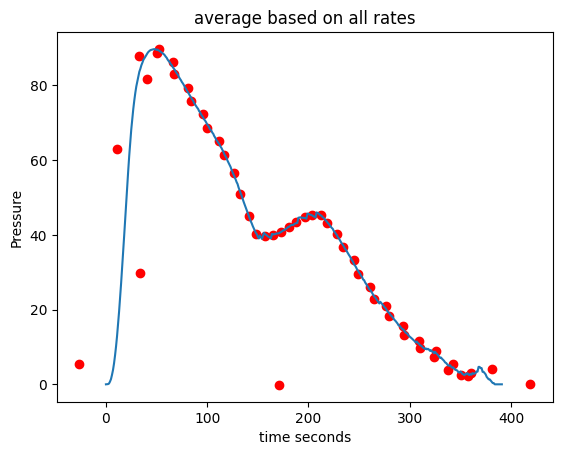

In [249]:
#to get data for the overall mean 
all_overlaps_means = []
#mean for each row
for lists in all_overlaps:
    all_overlaps_means.append(np.mean(lists))


all_overlaps_means = [x for x in all_overlaps_means if str(x) != 'nan']





resampled_y = signal.resample(all_overlaps_means[:476], 50)
resampled_x = signal.resample(list(range(len(all_overlaps_means))), 50)
print((resampled_y))
print((resampled_x))

plt.plot(resampled_x,resampled_y,  'ro' )
#plt.plot(resampled_y,  'ro' )
print(len(all_overlaps_means))
plt.plot(all_overlaps_means )

plt.title("average based on all rates")
plt.ylabel("Pressure")
plt.xlabel("time seconds")

plt.show()

In [250]:
# chopped_x_points=  [ int(x) for x in all_overlaps_means[0::20] ]
# #all_overlaps_means[0::20]
# #pos_pressure[chopped_x_points]
# chopped_y_points = list(range(len(chopped_x_points)))

print((all_overlaps_means[0::10]))

[np.float64(0.0), np.float64(10.17142857142857), np.float64(48.542857142857144), np.float64(79.71428571428571), np.float64(88.17142857142858), np.float64(89.48571428571428), np.float64(87.37142857142857), np.float64(83.2), np.float64(78.6), np.float64(74.05714285714286), np.float64(69.51428571428572), np.float64(65.05714285714286), np.float64(59.885714285714286), np.float64(53.6), np.float64(45.857142857142854), np.float64(39.48571428571429), np.float64(39.59375), np.float64(40.38709677419355), np.float64(42.096774193548384), np.float64(44.56666666666667), np.float64(45.6551724137931), np.float64(45.714285714285715), np.float64(42.92857142857143), np.float64(39.07142857142857), np.float64(34.607142857142854), np.float64(29.892857142857142), np.float64(25.428571428571427), np.float64(21.642857142857142), np.float64(19.0), np.float64(15.666666666666666), np.float64(12.777777777777779), np.float64(10.538461538461538), np.float64(8.958333333333334), np.float64(7.095238095238095), np.float6

all_overlaps_means[0::10]